# Exploratory Data Analysis on Juvenile Cases

**Dataset:** juvenile_cases_cleaned.csv.gz  
**Purpose:** Initial exploration of data structure, completeness, and key distributions.



In [21]:
!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [seaborn]m8/9 [seaborn]ib]


In [1]:
import pandas as pd

df = pd.read_csv("../../juvenile_cases_cleaned.csv.gz")  # adjust path if needed

print("Shape:", df.shape)
df.head()

Shape: (1858773, 12)


,IDNCASE,NAT,LANG,CUSTODY,CASE_TYPE,LATEST_HEARING,LATEST_CAL_TYPE,DATE_OF_ENTRY,C_BIRTHDATE,GENDER,DATE_DETAINED,DATE_RELEASED
0,13758313,GT,SP,N,RMV,NaN,NaN,2024-01-21,2008-02-01,F,NaN,NaN
1,14870586,MX,SP,D,RFR,2025-02-04,I,NaN,NaN,NaN,2025-01-22,NaN
2,14870588,GT,SP,R,WHO,2025-07-31,M,NaN,1997-06-01,F,2025-01-29,2025-02-06 00:00:00.000
3,13816559,MX,SP,N,RMV,2027-02-18,I,NaN,2020-05-01,M,NaN,NaN
4,13816560,MX,SP,N,RMV,2027-02-18,I,NaN,2021-05-01,F,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858773 entries, 0 to 1858772
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   IDNCASE          int64         
 1   NAT              object        
 2   LANG             object        
 3   CUSTODY          object        
 4   CASE_TYPE        object        
 5   LATEST_HEARING   datetime64[ns]
 6   LATEST_CAL_TYPE  object        
 7   DATE_OF_ENTRY    datetime64[ns]
 8   C_BIRTHDATE      datetime64[ns]
 9   GENDER           object        
 10  DATE_DETAINED    datetime64[ns]
 11  DATE_RELEASED    datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(6)
memory usage: 170.2+ MB


In [13]:
rows = df.shape[0]
unique_juvenile_case_ids_len = len(df["IDNCASE"].unique())
case_counts = df["IDNCASE"].value_counts()

print(f"Since 2008, the EOIR database contains {rows:,} juvenile records.")
print(
    f"The dataset includes {unique_juvenile_case_ids_len:,} unique juvenile case IDs."
)
print(f"Median records per case ID: {case_counts.median()}")
print(f"Average records per case ID: {case_counts.mean():.2f}")
print(f"Cases with only one record: {(case_counts == 1).sum()}")

Since 2008, the EOIR database contains 1,858,773 juvenile records.
The dataset includes 1,858,773 unique juvenile case IDs.
Median records per case ID: 1.0
Average records per case ID: 1.00
Cases with only one record: 1858773


In [2]:
print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
df.head(10)

Columns: ['IDNCASE', 'NAT', 'LANG', 'CUSTODY', 'CASE_TYPE', 'LATEST_HEARING', 'LATEST_CAL_TYPE', 'DATE_OF_ENTRY', 'C_BIRTHDATE', 'GENDER', 'DATE_DETAINED', 'DATE_RELEASED']

Data types:
 IDNCASE             int64
NAT                object
LANG               object
CUSTODY            object
CASE_TYPE          object
LATEST_HEARING     object
LATEST_CAL_TYPE    object
DATE_OF_ENTRY      object
C_BIRTHDATE        object
GENDER             object
DATE_DETAINED      object
DATE_RELEASED      object
dtype: object


,IDNCASE,NAT,LANG,CUSTODY,CASE_TYPE,LATEST_HEARING,LATEST_CAL_TYPE,DATE_OF_ENTRY,C_BIRTHDATE,GENDER,DATE_DETAINED,DATE_RELEASED
0,13758313,GT,SP,N,RMV,NaN,NaN,2024-01-21,2008-02-01,F,NaN,NaN
1,14870586,MX,SP,D,RFR,2025-02-04,I,NaN,NaN,NaN,2025-01-22,NaN
2,14870588,GT,SP,R,WHO,2025-07-31,M,NaN,1997-06-01,F,2025-01-29,2025-02-06 00:00:00.000
3,13816559,MX,SP,N,RMV,2027-02-18,I,NaN,2020-05-01,M,NaN,NaN
4,13816560,MX,SP,N,RMV,2027-02-18,I,NaN,2021-05-01,F,NaN,NaN
5,8883844,MX,SP,D,WHO,2019-08-14,I,NaN,NaN,NaN,2019-04-15,NaN
6,8883845,GT,SP,N,RMV,NaN,NaN,NaN,2015-03-01,M,NaN,NaN
7,8883846,HO,SP,N,RMV,2019-05-31,M,2019-01-20,1982-05-01,M,NaN,NaN
8,8883847,GT,SP,N,RMV,2021-10-07,M,NaN,1986-07-01,F,NaN,NaN
9,8883849,GA,ENG,D,RMV,2019-04-25,M,2003-08-28,1979-02-01,M,2019-04-03,NaN


In [3]:
# Numeric columns
df.describe().T

# All columns (including object/category)
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDNCASE,1858773.0,NaN,NaN,NaN,9373723.397695,1656181.661051,2046990.0,8541537.0,9233537.0,9950000.0,14931802.0
NAT,1855716,234,GT,428582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LANG,1857081,449,SP,1504441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUSTODY,1858769,5,N,1010878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASE_TYPE,1858769,13,RMV,1721295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATEST_HEARING,1561951,8886,2023-02-07,1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LATEST_CAL_TYPE,1555203,2,M,1069154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DATE_OF_ENTRY,1378051,17709,2019-05-09,2744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C_BIRTHDATE,1412042,1119,2002-01-01,5309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GENDER,1370231,2,M,875507,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_summary = pd.DataFrame(
    {"missing_count": missing, "missing_percent": missing_percent}
)
missing_summary = missing_summary[missing_summary.missing_count > 0].sort_values(
    "missing_percent", ascending=False
)
missing_summary

,missing_count,missing_percent
DATE_RELEASED,1411804,75.953546
DATE_DETAINED,1053327,56.667866
GENDER,488542,26.283037
DATE_OF_ENTRY,480722,25.862330
C_BIRTHDATE,446731,24.033650
LATEST_CAL_TYPE,303570,16.331741
LATEST_HEARING,296822,15.968706
NAT,3057,0.164463
LANG,1692,0.091028
CUSTODY,4,0.000215


In [5]:
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

IDNCASE            1858773
DATE_OF_ENTRY        17709
DATE_RELEASED        10661
DATE_DETAINED         9874
LATEST_HEARING        8886
C_BIRTHDATE           1119
LANG                   449
NAT                    234
CASE_TYPE               13
CUSTODY                  5
LATEST_CAL_TYPE          2
GENDER                   2
dtype: int64


In [7]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts(dropna=False))


Value counts for 'NAT':
NAT
GT    428582
HO    380966
MX    273583
ES    215345
CU     62003
       ...  
KT         1
GZ         1
AB         1
b6         1
SM         1
Name: count, Length: 235, dtype: int64

Value counts for 'LANG':
LANG
SP     1504441
ENG      80068
POR      45998
PUN      21887
CRE      19854
        ...   
BFD          1
WUU          1
AKU          1
TAB          1
MAZ          1
Name: count, Length: 450, dtype: int64

Value counts for 'CUSTODY':
CUSTODY
N      1010878
R       471998
D       375884
SP           8
NaN          4
POR          1
Name: count, dtype: int64

Value counts for 'CASE_TYPE':
CASE_TYPE
RMV    1721295
CFR      88087
RFR      21395
WHO      21372
AOC       4358
DEP       1830
REC        218
EXC        153
CSR         51
0            5
NaN          4
AOL          2
NAC          2
DCC          1
Name: count, dtype: int64

Value counts for 'LATEST_HEARING':
LATEST_HEARING
NaN           296822
2023-02-07      1866
2023-05-02      1864
2023-04-04

In [9]:
date_cols = [
    col
    for col in df.columns
    if "DATE" in col or "date" in col or "HEARING" in col.upper()
]

for col in date_cols:
    # Convert to datetime, coerce errors (invalids become NaT)
    df[col] = pd.to_datetime(df[col], errors="coerce")
    print(
        f"\n{col} - min: {df[col].min()}, max: {df[col].max()}, "
        f"sample: {df[col].dropna().sample(3, random_state=1).tolist() if df[col].dropna().shape[0] >= 3 else df[col].dropna().tolist()}"
    )


LATEST_HEARING - min: 1977-08-01 00:00:00, max: 2029-12-31 00:00:00, sample: [Timestamp('2001-09-05 00:00:00'), Timestamp('2022-08-10 00:00:00'), Timestamp('2023-01-24 00:00:00')]

DATE_OF_ENTRY - min: 1900-12-01 00:00:00, max: 2026-01-12 00:00:00, sample: [Timestamp('2021-03-22 00:00:00'), Timestamp('2021-01-11 00:00:00'), Timestamp('2019-02-04 00:00:00')]

C_BIRTHDATE - min: 1900-04-01 00:00:00, max: 2046-04-01 00:00:00, sample: [Timestamp('1990-03-01 00:00:00'), Timestamp('1978-11-01 00:00:00'), Timestamp('1978-04-01 00:00:00')]

DATE_DETAINED - min: 1900-01-01 00:00:00, max: 2088-04-22 00:00:00, sample: [Timestamp('2021-08-12 00:00:00'), Timestamp('2018-10-18 00:00:00'), Timestamp('2021-12-09 00:00:00')]

DATE_RELEASED - min: 1983-11-02 00:00:00, max: 2033-02-02 00:00:00, sample: [Timestamp('2018-07-10 00:00:00'), Timestamp('2022-03-21 00:00:00'), Timestamp('2018-02-01 00:00:00')]


In [15]:
print("CUSTODY value counts:\n", df["CUSTODY"].value_counts(dropna=False))
print("\nCASE_TYPE value counts:\n", df["CASE_TYPE"].value_counts(dropna=False))
print("\nGENDER value counts:\n", df["GENDER"].value_counts(dropna=False))

CUSTODY value counts:
 CUSTODY
N      1010878
R       471998
D       375884
SP           8
NaN          4
POR          1
Name: count, dtype: int64

CASE_TYPE value counts:
 CASE_TYPE
RMV    1721295
CFR      88087
RFR      21395
WHO      21372
AOC       4358
DEP       1830
REC        218
EXC        153
CSR         51
0            5
NaN          4
AOL          2
NAC          2
DCC          1
Name: count, dtype: int64

GENDER value counts:
 GENDER
M      875507
F      494724
NaN    488542
Name: count, dtype: int64


In [16]:
df.describe()

,IDNCASE,LATEST_HEARING,DATE_OF_ENTRY,C_BIRTHDATE,DATE_DETAINED,DATE_RELEASED
count,1.858773e+06,1561951,1365380,1412042,768034,446883
mean,9.373723e+06,2022-01-09 17:15:26.203958784,2018-01-21 20:07:18.102212608,1997-05-11 16:12:58.045979136,2020-01-06 11:19:12.333359616,2019-09-30 09:58:39.876748032
min,2.046990e+06,1977-08-01 00:00:00,1900-12-01 00:00:00,1900-04-01 00:00:00,1900-01-01 00:00:00,1983-11-02 00:00:00
25%,8.541537e+06,2020-02-12 00:00:00,2017-01-21 00:00:00,1989-01-01 00:00:00,2018-08-15 00:00:00,2018-07-20 00:00:00
50%,9.233537e+06,2022-11-15 00:00:00,2019-02-19 00:00:00,1998-12-01 00:00:00,2019-11-18 00:00:00,2020-01-24 00:00:00
75%,9.950000e+06,2024-09-23 00:00:00,2021-03-10 00:00:00,2006-05-01 00:00:00,2022-07-12 00:00:00,2022-06-04 00:00:00
max,1.493180e+07,2029-12-31 00:00:00,2026-01-12 00:00:00,2046-04-01 00:00:00,2088-04-22 00:00:00,2033-02-02 00:00:00
std,1.656182e+06,NaN,NaN,NaN,NaN,NaN


In [17]:
df.isnull().sum().sort_values(ascending=False)

DATE_RELEASED      1411890
DATE_DETAINED      1090739
DATE_OF_ENTRY       493393
GENDER              488542
C_BIRTHDATE         446731
LATEST_CAL_TYPE     303570
LATEST_HEARING      296822
NAT                   3057
LANG                  1692
CUSTODY                  4
CASE_TYPE                4
IDNCASE                  0
dtype: int64

In [19]:
for col in ["CUSTODY", "CASE_TYPE", "GENDER"]:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(dropna=False))


CUSTODY value counts:
CUSTODY
N      1010878
R       471998
D       375884
SP           8
NaN          4
POR          1
Name: count, dtype: int64

CASE_TYPE value counts:
CASE_TYPE
RMV    1721295
CFR      88087
RFR      21395
WHO      21372
AOC       4358
DEP       1830
REC        218
EXC        153
CSR         51
0            5
NaN          4
AOL          2
NAC          2
DCC          1
Name: count, dtype: int64

GENDER value counts:
GENDER
M      875507
F      494724
NaN    488542
Name: count, dtype: int64


Matplotlib is building the font cache; this may take a moment.


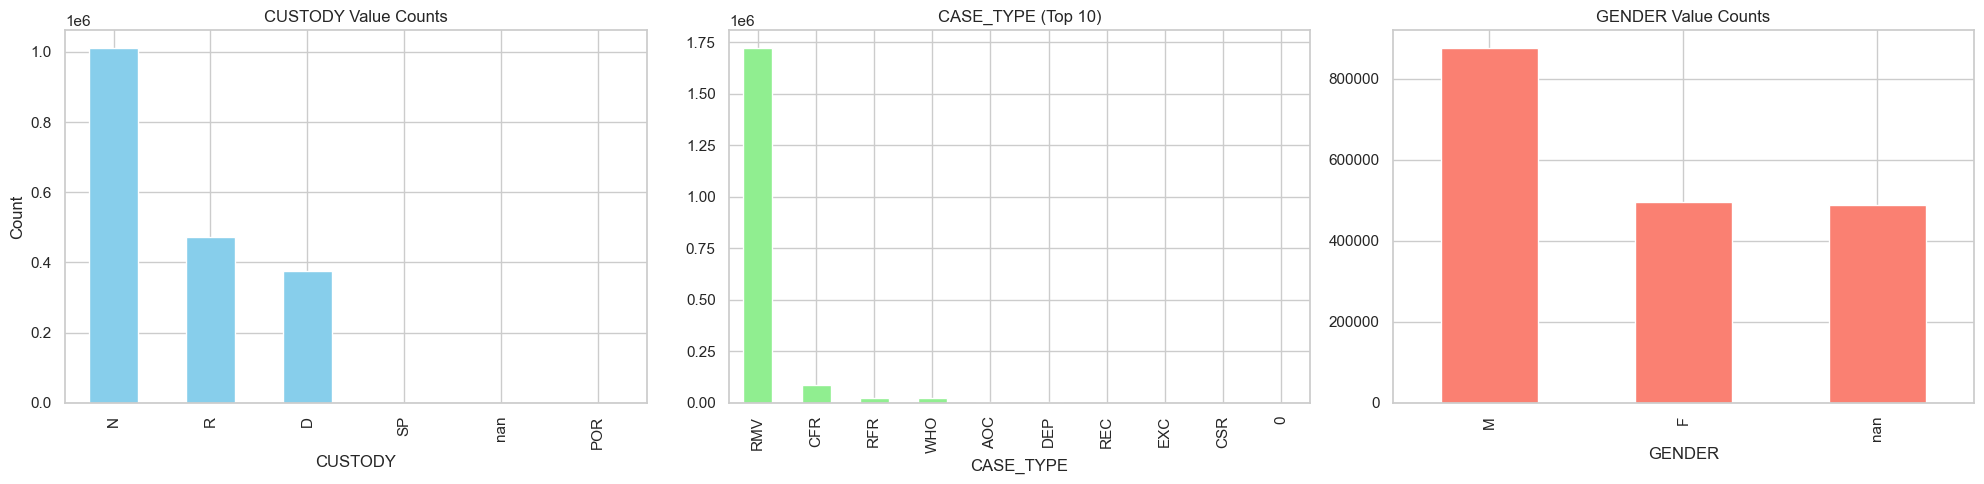

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 5))

# 1. CUSTODY
plt.subplot(1, 3, 1)
df["CUSTODY"].value_counts(dropna=False).plot(kind="bar", color="skyblue")
plt.title("CUSTODY Value Counts")
plt.xlabel("CUSTODY")
plt.ylabel("Count")

# 2. CASE_TYPE (show top 10 only for readability)
plt.subplot(1, 3, 2)
df["CASE_TYPE"].value_counts(dropna=False).head(10).plot(kind="bar", color="lightgreen")
plt.title("CASE_TYPE (Top 10)")
plt.xlabel("CASE_TYPE")

# 3. GENDER
plt.subplot(1, 3, 3)
df["GENDER"].value_counts(dropna=False).plot(kind="bar", color="salmon")
plt.title("GENDER Value Counts")
plt.xlabel("GENDER")

plt.tight_layout()
plt.show()

In [39]:
# Make sure your date column is datetime
df["DATE_OF_ENTRY"] = pd.to_datetime(df["DATE_OF_ENTRY"], errors="coerce")

# Create a 'Year' column
df["Year"] = df["DATE_OF_ENTRY"].dt.year

# Group by year and count the cases
cases_per_year = df["Year"].value_counts().sort_index()

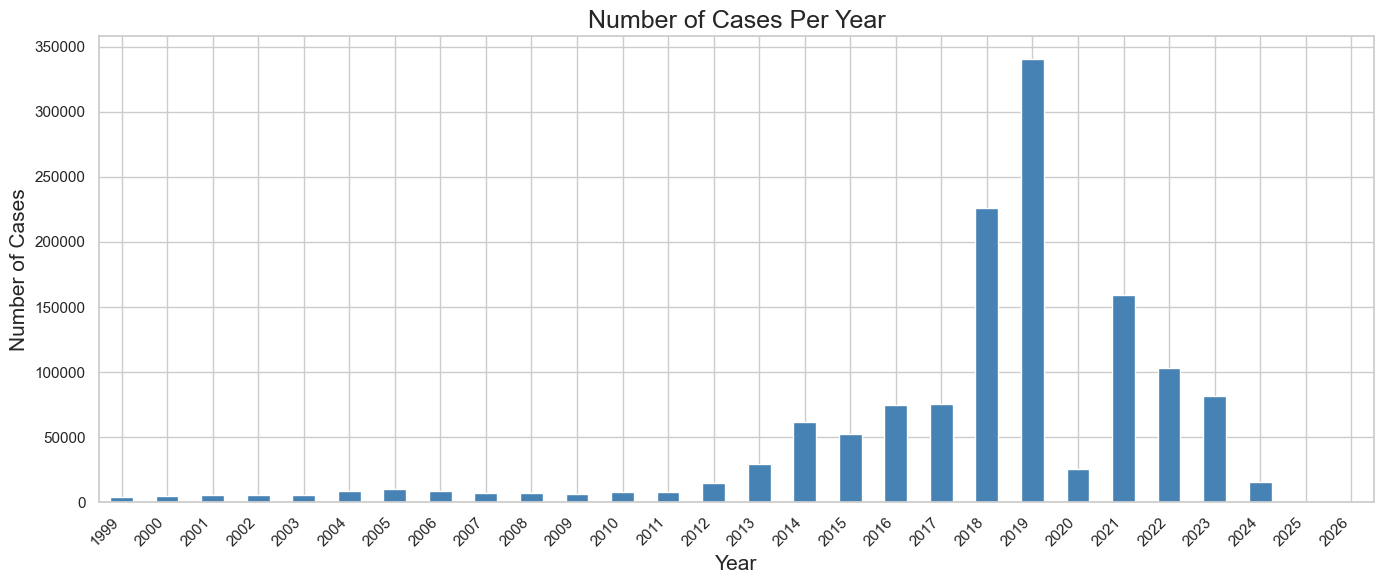

In [41]:
# Convert index to int and filter out zero-count years
cases_per_year.index = cases_per_year.index.astype(int)
cases_per_year = cases_per_year[cases_per_year > 0]

plt.figure(figsize=(14, 6))
cases_per_year.plot(kind="bar", color="steelblue")
plt.title("Number of Cases Per Year", fontsize=18)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Cases", fontsize=15)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()


cases_per_year = cases_per_year.loc[
    cases_per_year.index >= 1999
]  # Filter to start from 2000

plt.show()
# rest of the code as above

/var/folders/ls/d8__hpxn5wz3_snqr3dv6t4c0000gn/T/ipykernel_32907/2039980202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


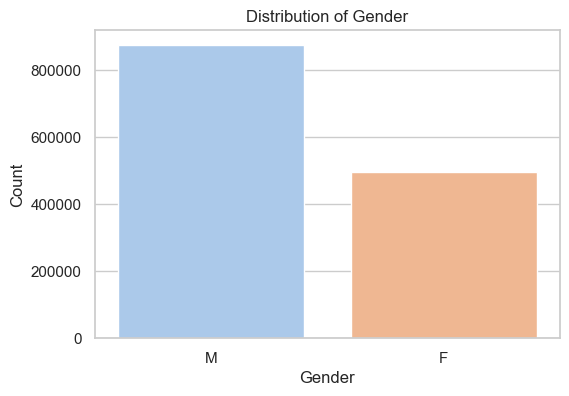

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df, x="GENDER", palette="pastel", order=df["GENDER"].value_counts().index
)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

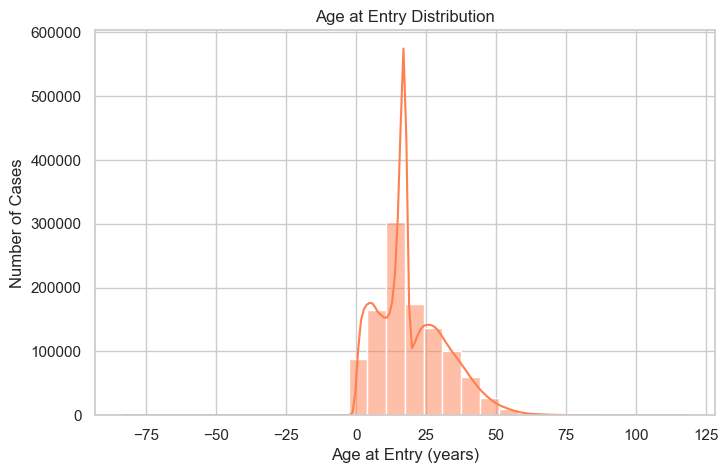

In [44]:
df["C_BIRTHDATE"] = pd.to_datetime(df["C_BIRTHDATE"], errors="coerce")
df["DATE_OF_ENTRY"] = pd.to_datetime(df["DATE_OF_ENTRY"], errors="coerce")
df["age_at_entry"] = (df["DATE_OF_ENTRY"] - df["C_BIRTHDATE"]).dt.days / 365.25
plt.figure(figsize=(8, 5))
sns.histplot(df["age_at_entry"].dropna(), bins=30, color="coral", kde=True)
plt.title("Age at Entry Distribution")
plt.xlabel("Age at Entry (years)")
plt.ylabel("Number of Cases")
plt.show()

/var/folders/ls/d8__hpxn5wz3_snqr3dv6t4c0000gn/T/ipykernel_32907/3052963751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_nat.index, x=top_nat.values, palette="mako")


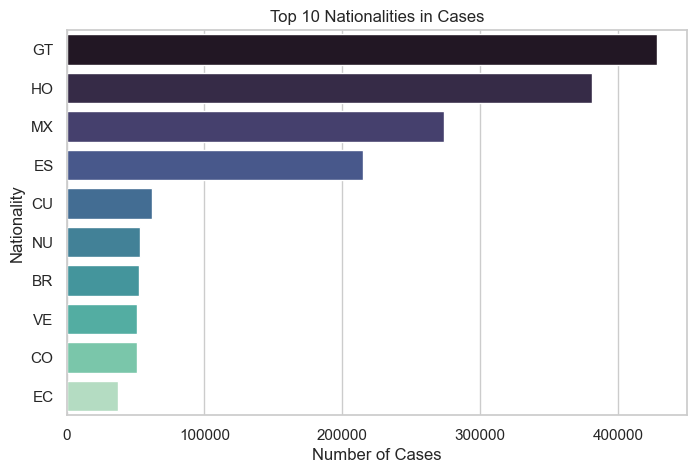

In [45]:
top_nat = df["NAT"].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(y=top_nat.index, x=top_nat.values, palette="mako")
plt.title("Top 10 Nationalities in Cases")
plt.xlabel("Number of Cases")
plt.ylabel("Nationality")
plt.show()

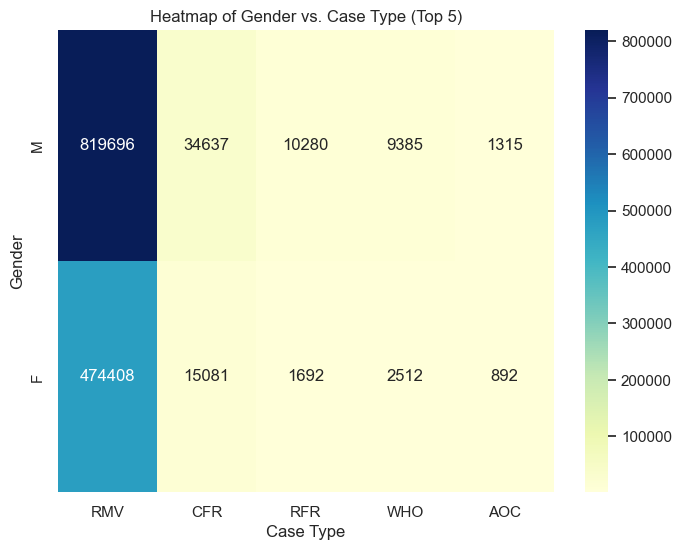

In [46]:
cross_tab = pd.crosstab(df["GENDER"], df["CASE_TYPE"])
top_genders = cross_tab.sum(axis=1).sort_values(ascending=False).head(5).index
top_cases = cross_tab.sum(axis=0).sort_values(ascending=False).head(5).index
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab.loc[top_genders, top_cases], annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Gender vs. Case Type (Top 5)")
plt.xlabel("Case Type")
plt.ylabel("Gender")
plt.show()